In [136]:
import numpy as np
import matplotlib.pyplot as plt

9911


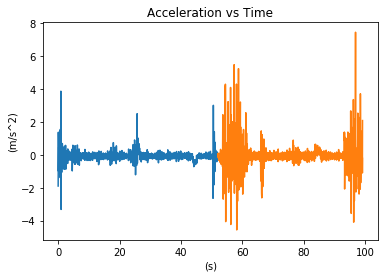

<Figure size 432x288 with 0 Axes>

In [137]:
ElevatorData = np.genfromtxt('Raw Data.csv', delimiter=',',skip_header=1)

time = []
x_acc = []
y_acc = []
z_acc = []
total_acc = []

for i in range(len(ElevatorData)):         # Reading data into individual arrays
    time.append(ElevatorData[i][0])
    x_acc.append(ElevatorData[i][1])
    y_acc.append(ElevatorData[i][2])
    z_acc.append(ElevatorData[i][3])
    total_acc.append(ElevatorData[i][4])
    
# print(ElevatorData[0])
# print(time)   
print(len(ElevatorData))

ascent_time = []
descent_time = []
ascent_z_acc = []
descent_z_acc = []

dt = 9.922193717/9911              # Number of seconds over the length of the array

divider = (ElevatorData[5200][0])  # 5200 was chosen somewhat arbitrarily here: I started at the halfway point and kept 
                                   # moving until I got a result in the plot that I liked     
    
for i in range(len(ElevatorData)):
    if (ElevatorData[i][0] < divider):
        ascent_time.append(ElevatorData[i][0])
        ascent_z_acc.append(ElevatorData[i][3])
    else:
        descent_time.append(ElevatorData[i][0])
        descent_z_acc.append(ElevatorData[i][3])
          
plt.plot(ascent_time, ascent_z_acc)
plt.plot(descent_time, descent_z_acc)
plt.title('Acceleration vs Time')
plt.xlabel('(s)')
plt.ylabel('(m/s^2)')
plt.show()
plt.clf()

# Rather difficult to discern when the downward trip begins, but if memory serves, the elevator began the ascension 
# at about t = 18s (you can see the small little bump before the larger one in between t=20 and 40; this was complete 
# noise in the data). At t = 50s or so, the elevator stopped and I got off, got back on (you can see the large amount 
# motion detected just before t = 60s). I then rode down, the elevator stopped at about t = 95s, and then I got off (more
# motion detected). The most noise occurs at the start time, the switching time, and the end time.

# As can be seen, right after the large spike before the noise of me getting on and off, the colour turns orange, 
# indicating that we are done the ascent, and beginning the descent


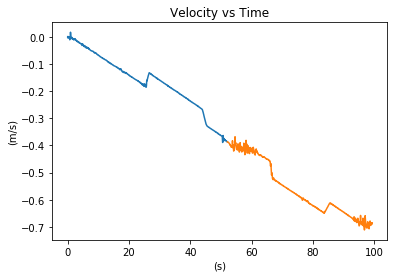

In [138]:
# CALCULATE V vs t (numerically integrate A vs t)

term_ascent = []                    # Each individual term; each tiny little 'rectangle' of width dt
term_descent = []
ascent_time_velocity = []
descent_time_velocity = []
ascent_velocity = []
descent_velocity = []

ascent_velocity.clear()
descent_velocity.clear()

for k in range(len(ascent_z_acc)-1):                                   # Ascent velocity
    term_ascent.append(((ascent_z_acc[k]+ascent_z_acc[k+1])/2)*dt)
    ascent_velocity.append(sum(term_ascent))
    ascent_time_velocity.append(ascent_time[k])
                
for k in range(len(descent_z_acc)-1):                                  # Descent velocity 
    term_descent.append(((descent_z_acc[k]+descent_z_acc[k+1])/2)*dt)
    descent_velocity.append(sum(term_descent)+sum(term_ascent))
    descent_time_velocity.append(descent_time[k])
        
plt.title('Velocity vs Time')
plt.xlabel('(s)')
plt.ylabel('(m/s)')
plt.plot(ascent_time_velocity, ascent_velocity)
plt.plot(descent_time_velocity, descent_velocity)
plt.show()

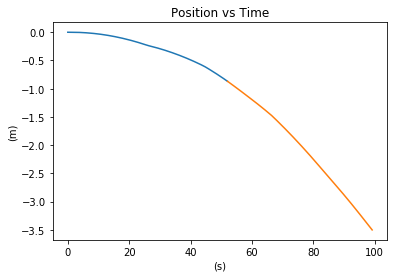

In [140]:
# CALCULATING P vs t (NUMERICALLY INTEGRATE V vs t)

pos_term_ascent = []                  
pos_term_descent = []
ascent_time_pos = []
descent_time_pos = []
ascent_pos = []
descent_pos = []

ascent_pos.clear()
descent_pos.clear()

for k in range(len(ascent_velocity)-1):                                  
    pos_term_ascent.append(((ascent_velocity[k]+ascent_velocity[k+1])/2)*dt)
    ascent_pos.append(sum(pos_term_ascent))
    ascent_time_pos.append(ascent_time_velocity[k])
                
for k in range(len(descent_velocity)-1):                                
    pos_term_descent.append(((descent_velocity[k]+descent_velocity[k+1])/2)*dt)
    descent_pos.append(sum(pos_term_descent)+sum(pos_term_ascent))
    descent_time_pos.append(descent_time_velocity[k])
        
plt.title('Position vs Time')
plt.xlabel('(s)')
plt.ylabel('(m)')
plt.plot(ascent_time_pos, ascent_pos)
plt.plot(descent_time_pos, descent_pos)
plt.show()